## Katie Mears

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# ! pip install emoji
# ! pip install nltk

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [75]:
# Add any additional import statements you need here
import string
import matplotlib.pyplot as plt


In [76]:
# change `data_location` to the location of the folder on your machine.
data_location = "/content/drive/MyDrive/M1 Results"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [77]:
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens,
    number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity),
    and num_tokens most common tokens. Return a list with the number of tokens, number
    of unique tokens, lexical diversity, and number of characters.
    """

    # Calculate the required statistics
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0.0

    # Count the most common tokens
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(num_tokens)

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # Print the five most common tokens
        print("The most common tokens are:")
        for token, count in most_common_tokens:
            print(f"{token}: {count}")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [78]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The most common tokens are:
text: 3
here: 2
example: 2
is: 1
some: 1
with: 1
other: 1
in: 1
this: 1


Q: Why is it beneficial to use assertion statements in your code?

A: Assertion statements are useful for catching errors early by verifying that specific conditions hold true during code execution. They improve debugging by pinpointing where issues occur and serve as automatic checks to ensure the correctness of code. Assertions also help document assumptions in the code and can be disabled in production to maintain performance, making them an efficient tool for maintaining code quality.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [79]:
# Read in the lyrics data

# Path to the folder containing Lyrics Data
lyrics_folder_path = '/content/drive/MyDrive/M1 Results/lyrics'
lyrics_data = {}

# Iterate through each artist's folder in the main lyrics folder
for artist in os.listdir(lyrics_folder_path):
    artist_folder_path = os.path.join(lyrics_folder_path, artist)

    if os.path.isdir(artist_folder_path):
        lyrics_data[artist] = {}

        # Iterate through each song file in the artist's folder
        for song_file in os.listdir(artist_folder_path):
            song_path = os.path.join(artist_folder_path, song_file)

            if os.path.isfile(song_path) and song_file.endswith('.txt'):
                # Extract song title from the filename (remove .txt extension)
                song_title = song_file[:-4]

                # Read the lyrics within the with block
                with open(song_path, 'r') as file:
                    lyrics_data[artist][song_title] = file.read()

# Test: Inspecting the lyrics for a specific artist and song
artist_name = 'cher'
song_title = 'cher_loveonarooftop'

# Checking for the existence of the lyrics
if artist_name in lyrics_data and song_title in lyrics_data[artist_name]:
    print(lyrics_data[artist_name][song_title])
else:
    print(f"Lyrics for '{song_title}' by '{artist_name}' not found.")


"Love On A Rooftop"



We used to talk forever on a dime
Now we live together never find the time
We used to walk as lovers on the sand
Now we're workin' full-time on our lifetime plan

We never stopped to see the moon at night
We're just too busy leadin' complicated lives

I remember love on a rooftop
We couldn't make the love stop
We were givin' all that we got

I remember holdin' you so tight
When kissin' lasted all night
Love on a rooftop

Look at us now, we're all grown up
We got it all together, got it all sewn up
But is this all it all was leadin' to
Do we just run out of dreams when all our dreams come true

Whatever happened to those endless nights
When we were happy livin' young and foolish lives

I remember love on a rooftop
We couldn't make the love stop
We were givin' all that we got

I remember holdin' you so tight
When kissin' lasted all night
Love on a rooftop

We never stopped to see the moon at night
We're just too busy leadin' complicated lives

I remember love on a 

In [80]:
# Convert the lyrics_data dictionary to a DataFrame
lyrics_list = []

for artist, songs in lyrics_data.items():
    for song_title, lyrics in songs.items():
        lyrics_list.append({'Artist': artist, 'Song Title': song_title, 'Lyrics': lyrics})

lyrics_df = pd.DataFrame(lyrics_list)

# Display the DataFrame
print(lyrics_df.head())
print(lyrics_df.tail())

  Artist                   Song Title  \
0   cher  cher_youvemademesoveryhappy   
1   cher      cher_stillinlovewithyou   
2   cher                  cher_pirate   
3   cher                cher_darklady   
4   cher            cher_disastercake   

                                              Lyrics  
0  "You've Made Me So Very Happy"\n\n\n\nI've los...  
1  "Still In Love With You"\n\n\n\nVisions haunt ...  
2  "Pirate"\n\n\n\nHe'll sail on with the summer ...  
3  "Dark Lady"\n\n\n\nThe fortune queen of New Or...  
4  "Disaster Cake"\n\n\n\nIf you're gonna make an...  
    Artist              Song Title  \
415  robyn          robyn_herewego   
416  robyn    robyn_notontheinside   
417  robyn  robyn_everylittlething   
418  robyn          robyn_robotboy   
419  robyn     robyn_tomteverkstan   

                                                Lyrics  
415  "Here We Go"\n\n\n\nI couldn't wait another mi...  
416  "Not On The Inside"\n\n\n\nIsn't funny how som...  
417  "Every Little Thin

In [81]:
# Read in the twitter data
twitter_folder_path = '/content/drive/MyDrive/M1 Results/twitter'

twitter_data = {}

# List of files for each artist
artist_files = {
    'cher': 'cher_followers_data.txt',
    'robyn': 'robynkonichiwa_followers_data.txt'
}

# Loop through the files for each artist and read descriptions
for artist, file_name in artist_files.items():
    file_path = os.path.join(twitter_folder_path, file_name)

    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            descriptions = file.readlines()
            twitter_data[artist] = [desc.strip() for desc in descriptions]

# Convert Twitter data to DataFrame for easier inspection
twitter_df = pd.DataFrame([
    {'Artist': artist, 'Description': description}
    for artist, descriptions in twitter_data.items()
    for description in descriptions
])


# Display the DataFrame
print(twitter_df.head())
print(twitter_df.tail())

  Artist                                        Description
0   cher  screen_name\tname\tid\tlocation\tfollowers_cou...
1   cher       hsmcnp\tCountry Girl\t35152213\t\t1302\t1014
2   cher  horrormomy\tJeny\t742153090850164742\tEarth\t8...
3   cher  anju79990584\tanju\t1496463006451974150\t\t13\...
4   cher       gallionjenna\tJ\t3366479914\t\t752\t556\tcsu
        Artist                                        Description
4353172  robyn  jakegiles\tJake Giles\t19725102\tLA\t7690\t216...
4353173  robyn  axelbluhme\tAxel Bluhme\t19573759\tDK\t238\t15...
4353174  robyn  RayRayRay27\tRachael :)\t19919217\tOldham\t762...
4353175  robyn  bhandberg\tBen Handberg\t12642462\tSydney\t432...
4353176  robyn  takemeback\tChristine\t15022058\tNew Jersey\t1...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [82]:
# Punctuation object from string library
punctuation = set(string.punctuation)

# Stopwords set
stop_words = set(stopwords.words('english'))

# Define the pipeline
pipeline = [
    lambda text: ''.join(char for char in text if char not in punctuation),  # Remove punctuation
    str.lower,  # Convert to lowercase
    lambda text: text.split(),  # Split into tokens
    lambda tokens: [token for token in tokens if token not in stop_words]  # Remove stopwords
]


In [83]:
# Apply the pipeline to the 'Lyrics' column - Lyrics Data
lyrics_df['Cleaned_Lyrics'] = lyrics_df['Lyrics'].apply(lambda x: pipeline[-1](pipeline[-2](pipeline[-3](pipeline[0](x)))))

# Check the result
print(lyrics_df[['Artist', 'Cleaned_Lyrics']])

    Artist                                     Cleaned_Lyrics
0     cher  [youve, made, happy, ive, lost, love, got, mad...
1     cher  [still, love, visions, haunt, memory, hold, ho...
2     cher  [pirate, hell, sail, summer, wind, blows, day,...
3     cher  [dark, lady, fortune, queen, new, orleans, bru...
4     cher  [disaster, cake, youre, gonna, make, omelette,...
..     ...                                                ...
415  robyn  [go, couldnt, wait, another, minute, cause, ba...
416  robyn  [inside, isnt, funny, people, never, practice,...
417  robyn  [every, little, thing, alone, forever, waiting...
418  robyn  [robotboy, hey, boy, smashed, toy, lost, circu...
419  robyn  [tomteverkstan, mmmm, dont, like, one, dont, l...

[420 rows x 2 columns]


In [84]:
# Apply the pipeline to the 'Description' column - Twitter Data
twitter_df['Cleaned_Description'] = twitter_df['Description'].apply(
    lambda x: pipeline[-1](pipeline[-2](pipeline[-3](pipeline[0](x))))
)

# Check the result
print(twitter_df[['Artist', 'Cleaned_Description']])

        Artist                                Cleaned_Description
0         cher  [screenname, name, id, location, followerscoun...
1         cher      [hsmcnp, country, girl, 35152213, 1302, 1014]
2         cher  [horrormomy, jeny, 742153090850164742, earth, ...
3         cher  [anju79990584, anju, 1496463006451974150, 13, ...
4         cher       [gallionjenna, j, 3366479914, 752, 556, csu]
...        ...                                                ...
4353172  robyn  [jakegiles, jake, giles, 19725102, la, 7690, 2...
4353173  robyn  [axelbluhme, axel, bluhme, 19573759, dk, 238, ...
4353174  robyn  [rayrayray27, rachael, 19919217, oldham, 762, ...
4353175  robyn  [bhandberg, ben, handberg, 12642462, sydney, 4...
4353176  robyn  [takemeback, christine, 15022058, new, jersey,...

[4353177 rows x 2 columns]


# Sanity Checks:

Lyrics Data


In [85]:
# Count total word count for Cher before removing stop words and tokenizing
cher_word_count = lyrics_df[lyrics_df['Artist'].str.lower() == 'cher']['Lyrics'].str.split().str.len().sum()

# Count total word count for Robyn before removing stop words and tokenizing
robyn_word_count = lyrics_df[lyrics_df['Artist'].str.lower() == 'robyn']['Lyrics'].str.split().str.len().sum()

# Print the results
print(f"Total word count for Cher: {cher_word_count}")
print(f"Total word count for Robyn: {robyn_word_count}")

Total word count for Cher: 70097
Total word count for Robyn: 29318


In [86]:
# Sum word counts for Cher's cleaned lyrics
cher_cleaned_word_count = lyrics_df[lyrics_df['Artist'] == 'cher']['Cleaned_Lyrics'].apply(len).sum()

# Sum word counts for Robyn's cleaned lyrics
robyn_cleaned_word_count = lyrics_df[lyrics_df['Artist'] == 'robyn']['Cleaned_Lyrics'].apply(len).sum()

# Print the results
print(f"Total word count for Cher's cleaned lyrics: {cher_cleaned_word_count}")
print(f"Total word count for Robyn's cleaned lyrics: {robyn_cleaned_word_count}")

Total word count for Cher's cleaned lyrics: 35916
Total word count for Robyn's cleaned lyrics: 15227


Twitter Data

In [87]:
# Count total word count for Cher before removing stop words and tokenizing - Twitter
cher_word_count = twitter_df[twitter_df['Artist'].str.lower() == 'cher']['Description'].str.split().str.len().sum()

# Count total word count for Robyn before removing stop words and tokenizing - Twitter
robyn_word_count = twitter_df[twitter_df['Artist'].str.lower() == 'robyn']['Description'].str.split().str.len().sum()

# Print the results
print(f"Total word count for Cher: {cher_word_count}")
print(f"Total word count for Robyn: {robyn_word_count}")

Total word count for Cher: 49693753
Total word count for Robyn: 4485480


In [88]:
# Count total word count for Cher in cleaned descriptions
cher_word_count = twitter_df[twitter_df['Artist'].str.lower() == 'cher']['Cleaned_Description'].apply(len).sum()

# Count total word count for Robyn in cleaned descriptions
robyn_word_count = twitter_df[twitter_df['Artist'].str.lower() == 'robyn']['Cleaned_Description'].apply(len).sum()

# Print the results
print(f"Total word count for Cher's cleaned descriptions: {cher_word_count}")
print(f"Total word count for Robyn's cleaned descriptions: {robyn_word_count}")

Total word count for Cher's cleaned descriptions: 42404149
Total word count for Robyn's cleaned descriptions: 3888265


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

# Calls to descriptive_stats here

In [89]:
# Call descriptive_stats on Lyrics Data
def descriptive_stats_all(lyrics_series):
    all_tokens = [token for song in lyrics_series for token in song]  # Flatten the list of lists
    total_tokens = len(all_tokens)
    unique_tokens = len(set(all_tokens))
    total_characters = sum(len(token) for token in all_tokens)
    lexical_diversity = unique_tokens / total_tokens if total_tokens > 0 else 0

    # Frequency distribution
    from collections import Counter
    most_common_tokens = Counter(all_tokens).most_common(10)

    print(f"There are {total_tokens} tokens in the data.")
    print(f"There are {unique_tokens} unique tokens in the data.")
    print(f"There are {total_characters} characters in the data.")
    print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    print("The most common tokens are:")
    for token, count in most_common_tokens:
        print(f"{token}: {count}")

In [90]:
# Call the function on Cher's cleaned lyrics
print("Cher's Overall Lyrics Descriptive Stats:")
descriptive_stats_all(lyrics_df[lyrics_df['Artist'] == 'cher']['Cleaned_Lyrics'])


Cher's Overall Lyrics Descriptive Stats:
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
The most common tokens are:
love: 1004
im: 513
know: 486
dont: 440
youre: 333
baby: 319
time: 319
see: 308
oh: 306
one: 282


In [91]:
# Call the function on Robyn's cleaned lyrics
print("Robyn's Overall Lyrics Descriptive Stats:")
descriptive_stats_all(lyrics_df[lyrics_df['Artist'] == 'robyn']['Cleaned_Lyrics'])


Robyn's Overall Lyrics Descriptive Stats:
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
The most common tokens are:
know: 308
dont: 301
im: 299
love: 275
got: 251
like: 232
baby: 222
youre: 169
never: 155
dance: 150


In [92]:
# Call descriptive_stats on Cher's Twitter descriptions
print("Cher's Twitter Description Descriptive Stats:")
descriptive_stats_all(twitter_df[twitter_df['Artist'] == 'cher']['Cleaned_Description'])

Cher's Twitter Description Descriptive Stats:
There are 42404149 tokens in the data.
There are 10667109 unique tokens in the data.
There are 266424726 characters in the data.
The lexical diversity is 0.252 in the data.
The most common tokens are:
0: 334292
1: 284601
2: 237886
love: 221728
3: 196690
4: 151142
im: 141980
usa: 140893
life: 125699
5: 123441


In [93]:
# Call descriptive_stats on Robyn's Twitter descriptions
print("Robyn's Twitter Description Descriptive Stats:")
descriptive_stats_all(twitter_df[twitter_df['Artist'] == 'robyn']['Cleaned_Description'])

Robyn's Twitter Description Descriptive Stats:
There are 3888265 tokens in the data.
There are 1136751 unique tokens in the data.
There are 24106279 characters in the data.
The lexical diversity is 0.292 in the data.
The most common tokens are:
0: 31800
1: 24115
2: 17675
music: 16049
3: 14372
sweden: 12721
love: 12190
4: 10628
new: 10249
stockholm: 9701


I wanted to remove the numbers from the Twitter data so that is done here:

In [94]:
# Define the pipeline
pipeline = [
    # Remove punctuation
    lambda text: ''.join(char for char in text if char not in punctuation),
    # Convert to lowercase
    str.lower,
    # Split into tokens
    lambda text: text.split(),
    # Remove numeric tokens and stopwords
    lambda tokens: [token for token in tokens if token not in stop_words and not token.isdigit()]
]

# Apply the pipeline to the 'description' column in the Twitter DataFrame
twitter_df['Cleaned_Description'] = twitter_df['Description'].apply(lambda x: pipeline[-1](pipeline[-2](pipeline[-3](pipeline[0](x)))))


# Check the result
print(twitter_df[['Artist', 'Cleaned_Description']])

        Artist                                Cleaned_Description
0         cher  [screenname, name, id, location, followerscoun...
1         cher                            [hsmcnp, country, girl]
2         cher  [horrormomy, jeny, earth, 𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏...
3         cher  [anju79990584, anju, 163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓...
4         cher                             [gallionjenna, j, csu]
...        ...                                                ...
4353172  robyn  [jakegiles, jake, giles, la, singer, songs, ty...
4353173  robyn  [axelbluhme, axel, bluhme, dk, dadx2, conarch,...
4353174  robyn  [rayrayray27, rachael, oldham, year, change, l...
4353175  robyn  [bhandberg, ben, handberg, sydney, head, consu...
4353176  robyn  [takemeback, christine, new, jersey, stand, ri...

[4353177 rows x 2 columns]


In [95]:
# Count total word count for Cher in cleaned descriptions - after removing numbers
cher_word_count = twitter_df[twitter_df['Artist'].str.lower() == 'cher']['Cleaned_Description'].apply(len).sum()

# Count total word count for Robyn in cleaned descriptions - after removing numbers
robyn_word_count = twitter_df[twitter_df['Artist'].str.lower() == 'robyn']['Cleaned_Description'].apply(len).sum()

# Print the results
print(f"Total word count for Cher's cleaned descriptions: {cher_word_count}")
print(f"Total word count for Robyn's cleaned descriptions: {robyn_word_count}")

Total word count for Cher's cleaned descriptions: 30052904
Total word count for Robyn's cleaned descriptions: 2784554


In [96]:
# Call descriptive_stats on Cher's Twitter descriptions - After removing numbers
print("Cher's Twitter Description Descriptive Stats:")
descriptive_stats_all(twitter_df[twitter_df['Artist'] == 'cher']['Cleaned_Description'])

Cher's Twitter Description Descriptive Stats:
There are 30052904 tokens in the data.
There are 6604985 unique tokens in the data.
There are 200372525 characters in the data.
The lexical diversity is 0.220 in the data.
The most common tokens are:
love: 221728
im: 141980
usa: 140893
life: 125699
new: 106519
de: 94402
music: 91504
ca: 70722
follow: 64606
lover: 61377


In [97]:
# Call descriptive_stats on Robyn's Twitter descriptions - After removing numbers
print("Robyn's Twitter Description Descriptive Stats:")
descriptive_stats_all(twitter_df[twitter_df['Artist'] == 'robyn']['Cleaned_Description'])

Robyn's Twitter Description Descriptive Stats:
There are 2784554 tokens in the data.
There are 762752 unique tokens in the data.
There are 18723407 characters in the data.
The lexical diversity is 0.274 in the data.
The most common tokens are:
music: 16049
sweden: 12721
love: 12190
new: 10249
stockholm: 9701
im: 9285
de: 8510
london: 8350
och: 8005
life: 7583


Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A: Leaving stopwords in the data would likely result in common words like "the," "and," and "I" dominating the top five word counts, overshadowing more meaningful words. This would reduce the focus on significant content and lower the lexical diversity of the text. Overall, including stopwords can make the analysis less informative and shift attention away from the key themes or sentiments expressed.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A: I hadnt really had an opinion about what the lexical diversity would be between the artists but I am seeing that Robyn had a higher value in her lyrics data which indicates that she uses a broader volcabulary and less repetition in word selection in her lyrics.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [98]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [99]:
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

In [100]:
# Initialize lists to store results
emoji_list = []

# Loop through each artist
for artist in twitter_df['Artist'].unique():
    artist_data = twitter_df[twitter_df['Artist'] == artist]

    # Count emojis
    emojis = artist_data['Description'].apply(extract_emojis).explode().dropna()
    most_common_emojis = emojis.value_counts().head(10)

    # Store results for emojis
    for emoji_val, count in most_common_emojis.items():
        emoji_list.append({'Artist': artist, 'Emoji': emoji_val, 'Count': count})

# Create DataFrames from the lists
emoji_counts = pd.DataFrame(emoji_list)

# Display results
print("Most Common Emojis:")
print(emoji_counts)

Most Common Emojis:
   Artist Emoji  Count
0    cher     ❤  94506
1    cher     🌈  66291
2    cher     ♥  48059
3    cher     🏳  47174
4    cher     ✨  45846
5    cher     🌊  31234
6    cher     💙  31050
7    cher     🏻  25195
8    cher     ✌  21963
9    cher     💜  21571
10  robyn     🌈   6086
11  robyn     ❤   5635
12  robyn     🏳   4641
13  robyn     ♥   4249
14  robyn     ✨   3217
15  robyn     🏻   1751
16  robyn     ✌   1495
17  robyn     ♀   1347
18  robyn     🏼   1340
19  robyn     💙   1200


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [101]:
def extract_hashtags(text):
    return [word for word in text.split() if word.startswith('#')]

# Initialize lists to store results
hashtag_list = []

# Loop through each artist
for artist in twitter_df['Artist'].unique():
    artist_data = twitter_df[twitter_df['Artist'] == artist]

    # Count hashtags
    hashtags = artist_data['Description'].apply(extract_hashtags).explode().dropna()
    most_common_hashtags = hashtags.value_counts().head(10)

    # Store results for hashtags
    for hashtag, count in most_common_hashtags.items():
        hashtag_list.append({'Artist': artist, 'Hashtag': hashtag, 'Count': count})

# Create DataFrames from the lists
hashtag_counts = pd.DataFrame(hashtag_list)

# Display results
print("Most Common Hashtags:")
print(hashtag_counts)

Most Common Hashtags:
   Artist            Hashtag  Count
0    cher               #BLM   8388
1    cher            #Resist   5095
2    cher  #BlackLivesMatter   4414
3    cher            #resist   3180
4    cher               #FBR   2834
5    cher                 #1   2580
6    cher  #blacklivesmatter   2551
7    cher     #TheResistance   2501
8    cher                  #   2205
9    cher        #Resistance   1538
10  robyn  #BlackLivesMatter    329
11  robyn               #BLM    310
12  robyn  #blacklivesmatter    213
13  robyn                 #1    213
14  robyn                  #    175
15  robyn             #music    151
16  robyn             #Music     94
17  robyn               #EDM     79
18  robyn               #blm     55
19  robyn    #TeamFollowBack     51


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [102]:
# Define a function to clean and split titles
def clean_and_split_titles(titles):
    titles_cleaned = titles.translate(str.maketrans('', '', string.punctuation)).lower()
    return titles_cleaned.split()

# Initialize a dictionary to store word counts for each artist
word_counts = {}

# Loop through each artist in the lyrics DataFrame
for artist in lyrics_df['Artist'].unique():
    artist_lyrics = lyrics_df[lyrics_df['Artist'] == artist]['Lyrics']

    # Extract the first line from each lyrics entry and combine into a single string
    titles = artist_lyrics.apply(lambda x: x.split('\n')[0])
    words = clean_and_split_titles(' '.join(titles))

    # Count occurrences of each word
    word_counts[artist] = Counter(words)

# Get the five most common words for each artist
most_common_words = {artist: counts.most_common(5) for artist, counts in word_counts.items()}

# Display results
for artist, common_words in most_common_words.items():
    print(f"Five Most Common Words in {artist}'s Song Titles:")
    for word, count in common_words:
        print(f"{word}: {count}")
    print()

Five Most Common Words in cher's Song Titles:
the: 54
you: 41
love: 38
i: 32
to: 28

Five Most Common Words in robyn's Song Titles:
me: 11
the: 8
you: 8
my: 8
love: 6



### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


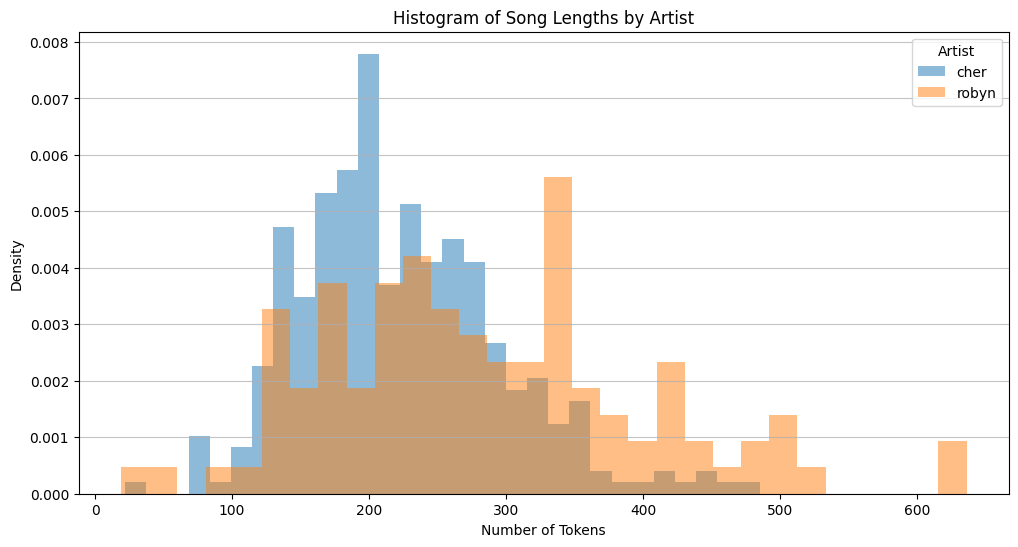

In [103]:
# Calculate the number of tokens for each song
lyrics_df['Token_Length'] = lyrics_df['Lyrics'].apply(lambda x: len(x.split()))

# Create a DataFrame with artist and token lengths
lengths_df = pd.DataFrame({
    'artist': lyrics_df['Artist'],
    'length': lyrics_df['Token_Length']
})

# Plot histograms of song lengths for each artist
plt.figure(figsize=(12, 6))
lengths_df.groupby('artist')['length'].plot(kind='hist', density=True, alpha=0.5, legend=True, bins=30)

plt.title('Histogram of Song Lengths by Artist')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.legend(title='Artist')
plt.grid(axis='y', alpha=0.75)
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: The regular expression \s+ is used to match one or more whitespace characters in a string.


In [104]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) :
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

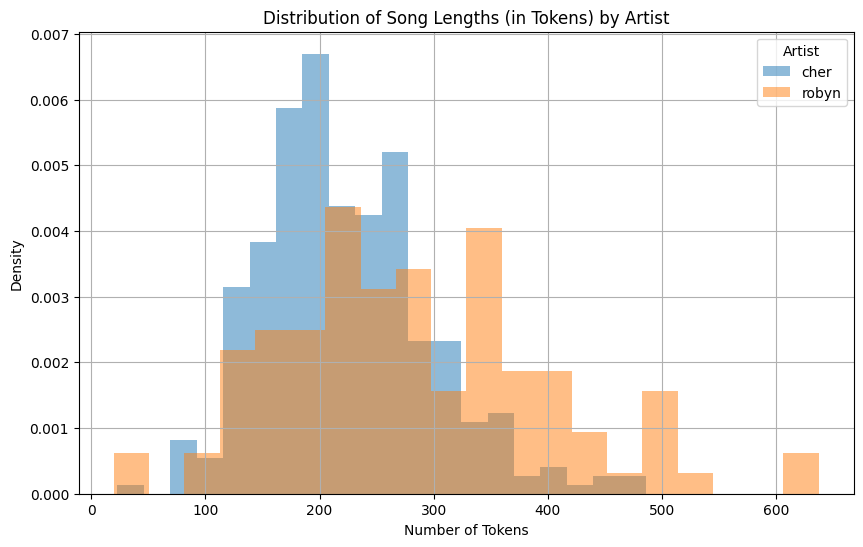

In [105]:
# Assuming lyrics_df contains the song lyrics
lyric_lengths = []

# Loop through each artist in the DataFrame
for artist in lyrics_df['Artist'].unique():
    artist_data = lyrics_df[lyrics_df['Artist'] == artist]

    # Calculate the length of each song's lyrics
    for index, row in artist_data.iterrows():
        length = len(tokenize_lyrics(row['Lyrics']))  # Get the length of tokenized lyrics
        lyric_lengths.append({'Artist': artist, 'Length': length})

# Create a DataFrame from the collected lengths
length_df = pd.DataFrame(lyric_lengths)

# Plotting the histogram
plt.figure(figsize=(10, 6))
length_df.groupby('Artist')['Length'].plot(kind='hist', density=True, alpha=0.5, legend=True, bins=20)
plt.title('Distribution of Song Lengths (in Tokens) by Artist')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.legend(title='Artist')
plt.grid()
plt.show()

# References

AZLyrics. “AZLyrics - Song Lyrics from a to Z.” Azlyrics.com, 2019, www.azlyrics.com/.

OpenAI. (2024). ChatGPT [Large language model]. https://openai.com/chatgpt

In [106]:
%%capture
!apt-get install texlive texlive-xetex texlive-fonts-recommended texlive-latex-extra

!pip install pypandoc

In [109]:
%%capture
!jupyter nbconvert --to pdf '/content/drive/MyDrive/KM_Lyrics_Description_EDA.ipynb'